# Chicago Crime Data Set EDA

This notebook presents an exploratory data analysis of the Chicago Crime data set. This initial analysis aims to clean and pre-process the data, and then explore it.

## Data Pre-Processing

### Environment Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

### Load data

First, let's load the data. Since we are basically analyzing a series with temporal data, it makes sense to use `Date` as the index.

In [3]:
filenames = ['data/2001-2018/Chicago_Crimes_2001_to_2004.csv',
             'data/2001-2018/Chicago_Crimes_2005_to_2007.csv',
             'data/2001-2018/Chicago_Crimes_2008_to_2011.csv',
             'data/2001-2018/Chicago_Crimes_2012_to_2017.csv']
datasets = []

for filename in filenames:
    datasets.append(pd.read_csv(filename, index_col='Date', parse_dates=True, error_bad_lines=False))

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/Users/vitorsb/anaconda/envs/ds/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


From the warnings above, we can see a few lines were skipped while reading the data set. However, that shouldn't be a problem given the size of the data set, with almost 8 million rows in total:

In [6]:
for dataset in datasets:
    print('Length of data set: {}'.format(len(dataset.index)))
    
print('Total number of rows: {}'.format(sum([len(x.index) for x in datasets])))

Length of data set: 1923515
Length of data set: 1872343
Length of data set: 2688710
Length of data set: 1456714
Total number of rows: 7941282


### Combine Data Sets

Since all data sets are going to be used in this analysis, let's combine all of them into a single variable to make them easier to work with.

In [7]:
crimes_df = pd.concat(datasets)

### Missing Data

Now let's check for any missing data in our data set.

In [8]:
crimes_df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

The fields `X Coordinate`, `Y Coordinate`, `Latitude`, `Longitude`, and `Location` all have similar missing values, and are redundant, since they present different versions of the same information. To reduce the data set size and improve performance, we can remove some of those variables.

In [9]:
crimes_df.drop(columns=['X Coordinate', 'Y Coordinate', 'Location'], inplace=True)

Let's take a closer look at the rows with missing `Community Area`.

In [10]:
missing_community = crimes_df[crimes_df['Community Area'].isnull()]

Let's check if the missing community data is centered on a specific period or is spread out throughout the data.

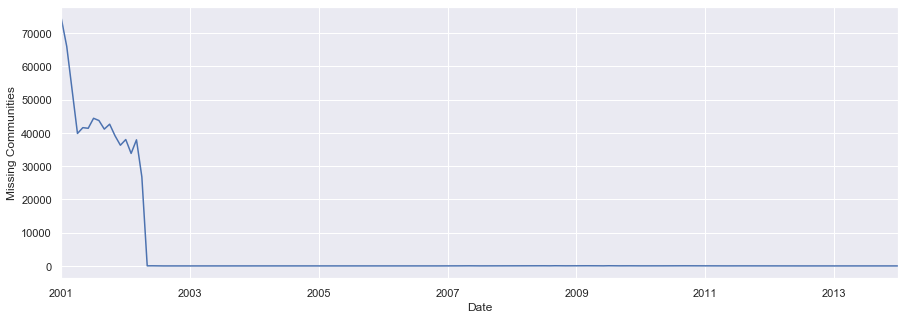

In [21]:
missing_community.resample('M')['ID'].count().plot.line(figsize=(15,5))
plt.ylabel('Missing Communities');

It looks like the missing data is mostly contained in the period of 2001–2002. We should take note of that and adjust accordingly during the analysis.

## Exploratory Data Analysis

In this section we will explore a few different plots to get a sense of the data and its characteristics.

### Evolution of number crimes through the years

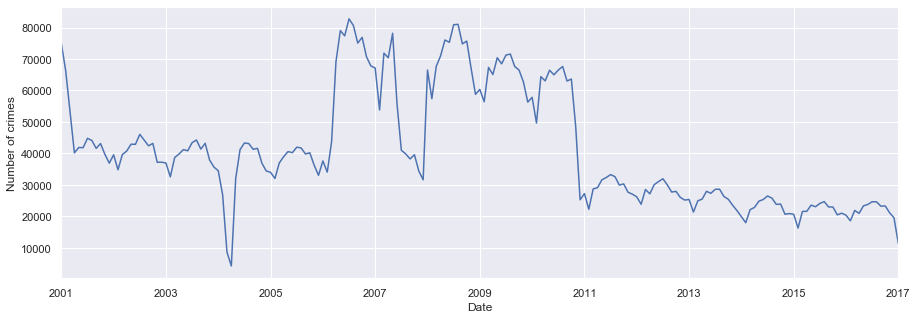

In [25]:
crimes_df.resample('M')['ID'].count().plot(figsize=(15,5))
plt.ylabel('Number of crimes');

### Number of crimes per type of location

In [30]:
len(crimes_df['Location Description'].unique())

173

Since there are 173 different location types, let's plot just the ones with more crimes.

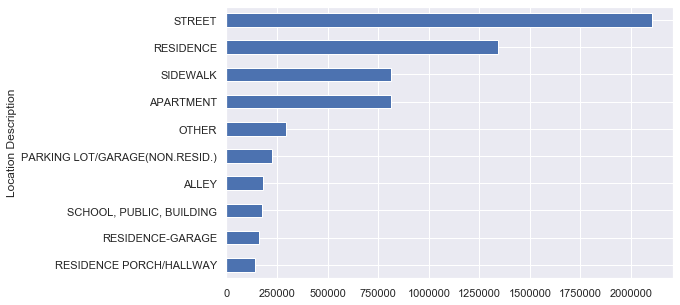

In [52]:
top_10_crime_locations = crimes_df.groupby('Location Description')['ID'].count().sort_values(ascending=False)[:10]
top_10_crime_locations[::-1].plot.barh(figsize=(8,5));

<!-- - Number of crimes per month/year -->
- Aggregate crimes per hour of day
- Aggregate crimes per day of week
- Break down by crime type
<!-- - Number of crimes per type of location -->
- Map of crimes
    - Break down by type
    - Break down by arrest


In [13]:
# Save data on disk to resume work later
crimes_df.to_pickle('data/processed_data.pkl')